## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!


import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

import pickle


In [2]:
path = 'Data/im.db/im.db'
conn = sqlite3.connect(path)
cursor = conn.cursor()

In [3]:
pd.read_sql('''SELECT * 
FROM movie_basics''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
imdb_data = pd.read_sql('''SELECT * 
FROM movie_ratings
JOIN movie_basics
USING(movie_id)
JOIN principals
USING(movie_id)
JOIN persons
USING(person_id)
''', conn)

In [5]:
imdb_data['primary_title'] = imdb_data['primary_title'].str.upper()
imdb_data['primary_title'] = imdb_data['primary_title'].str.strip()
imdb_data['primary_title'] = imdb_data['primary_title'].str.replace(' ', '-')

In [6]:
path = 'Data/tn.movie_budgets.csv.gz'
conn2 = sqlite3.connect(path)
cursor2 = conn.cursor()

In [7]:
file_path1 = 'Data/tn.movie_budgets.csv.gz'

movie_budget_data = pd.read_csv(file_path1, compression = 'gzip')
movie_budget_data.sort_values(by ='worldwide_gross', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"
5062,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886"
883,84,"Apr 2, 2004",Hellboy,"$60,000,000","$59,623,958","$99,823,958"
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000"
...,...,...,...,...,...,...
5488,89,"Dec 31, 2014",The Sound and the Shadow,"$500,000",$0,$0
5487,88,"Dec 1, 2015",Brooklyn Bizarre,"$500,000",$0,$0
5486,87,"Aug 11, 2015",Alleluia! The Devil's Carnival,"$500,000",$0,$0
5485,86,"Jun 23, 2015",Crossroads,"$500,000",$0,$0


In [8]:
a = movie_budget_data[movie_budget_data['movie'] == 'Toy Story 3']
a

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
46,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [9]:
pd.to_datetime(movie_budget_data['release_date'])
movie_budget_data['release_date'].sort_values(ascending=False)

3584    Sep 9, 2016
3129    Sep 9, 2016
3712    Sep 9, 2016
3287    Sep 9, 2016
849     Sep 9, 2016
           ...     
1408    Apr 1, 2005
5769    Apr 1, 1996
2260    Apr 1, 1988
5520    Apr 1, 1986
5559    Apr 1, 1975
Name: release_date, Length: 5782, dtype: object

In [10]:
movie_budget_data.rename(columns={'movie': 'title'}, inplace=True)
movie_budget_data['title'] = movie_budget_data['title'].str.upper()
movie_budget_data['title'] = movie_budget_data['title'].str.strip()
movie_budget_data['title'] = movie_budget_data['title'].str.replace(' ', '-')

movie_budget_data['production_budget'] = movie_budget_data['production_budget'].str.replace('$', '')
movie_budget_data['production_budget'] = movie_budget_data['production_budget'].str.replace(',', '')
movie_budget_data['production_budget'] = movie_budget_data['production_budget'].astype(int)

movie_budget_data['domestic_gross'] = movie_budget_data['domestic_gross'].str.replace('$', '')
movie_budget_data['domestic_gross'] = movie_budget_data['domestic_gross'].str.replace(',', '')
movie_budget_data['domestic_gross'] = movie_budget_data['domestic_gross'].astype(int)

movie_budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   object
dtypes: int32(2), int64(1), object(3)
memory usage: 226.0+ KB


In [11]:
file_path2 = 'Data/bom.movie_gross.csv.gz'

movie_gross_data = pd.read_csv(file_path2, compression = 'gzip')
movie_gross_data['title'] = movie_gross_data['title'].str.upper()
movie_gross_data['title'] = movie_gross_data['title'].str.strip()
movie_gross_data['title'] = movie_gross_data['title'].str.replace(' ', '-')

movie_gross_data = movie_gross_data.dropna(subset=['domestic_gross', 'year', 'studio'])
movie_gross_data['foreign_gross'].fillna(0, inplace=True)



In [12]:
movie_gross_data['year'].value_counts()

2015    449
2016    433
2011    396
2012    393
2014    390
2013    345
2010    322
2017    320
2018    308
Name: year, dtype: int64

In [13]:
financial_movie_data = pd.merge(movie_budget_data, movie_gross_data, on='title', how='inner')
financial_movie_data

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,"$1,045,663,875",BV,241100000.0,804600000,2011
1,4,"May 1, 2015",AVENGERS:-AGE-OF-ULTRON,330600000,459005868,"$1,403,013,963",BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",AVENGERS:-INFINITY-WAR,300000000,678815482,"$2,048,134,200",BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",JUSTICE-LEAGUE,300000000,229024295,"$655,945,209",WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",SPECTRE,300000000,200074175,"$879,620,923",Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...
1280,68,"Apr 27, 2012",SOUND-OF-MY-VOICE,135000,408015,"$429,448",FoxS,408000.0,0,2012
1281,73,"Jun 15, 2012",YOUR-SISTER'S-SISTER,120000,1597486,"$3,090,593",IFC,1600000.0,0,2012
1282,80,"Jul 10, 2015",THE-GALLOWS,100000,22764410,"$41,656,474",WB (NL),22800000.0,20200000,2015
1283,86,"Jul 7, 2017",A-GHOST-STORY,100000,1594798,"$2,769,782",A24,1600000.0,0,2017


In [14]:
movie_gross_data.year.value_counts()

2015    449
2016    433
2011    396
2012    393
2014    390
2013    345
2010    322
2017    320
2018    308
Name: year, dtype: int64

In [15]:
file_path3 = 'Data/tmdb.movies.csv.gz'

tmdb_movie_data = pd.read_csv(file_path3, compression = 'gzip')
tmdb_movie_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [16]:
tmdb_movie_data['title'] = tmdb_movie_data['title'].str.upper()
tmdb_movie_data['title'] = tmdb_movie_data['title'].str.strip()
tmdb_movie_data['title'] = tmdb_movie_data['title'].str.replace(' ', '-')

tmdb_movie_data['release_date']


0        2010-11-19
1        2010-03-26
2        2010-05-07
3        1995-11-22
4        2010-07-16
            ...    
26512    2018-10-13
26513    2018-05-01
26514    2018-10-01
26515    2018-06-22
26516    2018-10-05
Name: release_date, Length: 26517, dtype: object

In [17]:
q = '''
SELECT title, domestic_gross, foreign_gross
FROM movie_gross_data
WHERE studio = 'Orch.'
;'''

pysqldf(q)

,title,domestic_gross,foreign_gross
0,CARTEL-LAND,704000.0,422000
1,DIOR-AND-I,1000000.0,0
2,NASTY-BABY,79800.0,0
3,CLUB-LIFE,4400.0,0
4,HUNT-FOR-THE-WILDERPEOPLE,5200000.0,0
5,THE-MUSIC-OF-STRANGERS,1200000.0,0
6,NERUDA,939000.0,0
7,"LIFE,-ANIMATED",255000.0,0
8,LOUDER-THAN-BOMBS,164000.0,0
9,THELMA,147000.0,0


In [18]:
finance_plus_vote_data = pd.merge(financial_movie_data, tmdb_movie_data, on='title', how='inner')
finance_plus_vote_data



,id_x,release_date_x,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,"May 20, 2011",PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,"$1,045,663,875",BV,241100000.0,804600000,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
1,4,"May 1, 2015",AVENGERS:-AGE-OF-ULTRON,330600000,459005868,"$1,403,013,963",BV,459000000.0,946400000,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
2,7,"Apr 27, 2018",AVENGERS:-INFINITY-WAR,300000000,678815482,"$2,048,134,200",BV,678800000.0,"1,369.5",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
3,9,"Nov 17, 2017",JUSTICE-LEAGUE,300000000,229024295,"$655,945,209",WB,229000000.0,428900000,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
4,9,"Nov 17, 2017",JUSTICE-LEAGUE,300000000,229024295,"$655,945,209",WB,229000000.0,428900000,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,68,"Apr 27, 2012",SOUND-OF-MY-VOICE,135000,408015,"$429,448",FoxS,408000.0,0,2012,2815,"[878, 18, 9648, 53]",86812,en,Sound of My Voice,7.212,2011-01-22,6.4,169
1448,73,"Jun 15, 2012",YOUR-SISTER'S-SISTER,120000,1597486,"$3,090,593",IFC,1600000.0,0,2012,5468,"[18, 35]",84355,en,Your Sister's Sister,7.115,2012-06-14,6.6,192
1449,80,"Jul 10, 2015",THE-GALLOWS,100000,22764410,"$41,656,474",WB (NL),22800000.0,20200000,2015,14362,"[27, 53]",299245,en,The Gallows,9.166,2015-07-10,4.8,591
1450,86,"Jul 7, 2017",A-GHOST-STORY,100000,1594798,"$2,769,782",A24,1600000.0,0,2017,20776,"[18, 14, 10749]",428449,en,A Ghost Story,11.886,2017-07-07,7.0,906


In [19]:
finance_plus_vote_data['original_language'].value_counts()

en    1400
fr      11
hi       8
es       4
ko       4
ru       4
th       2
it       2
ar       2
zh       2
hu       1
el       1
te       1
no       1
he       1
sv       1
da       1
fa       1
pt       1
xx       1
tr       1
de       1
pl       1
Name: original_language, dtype: int64

In [20]:
finance_plus_vote_data = finance_plus_vote_data.drop(columns=['id_x', 'release_date_x', 'domestic_gross_y', 'Unnamed: 0', 'id_y'])

finance_plus_vote_data['worldwide_gross'] = finance_plus_vote_data['worldwide_gross'].str.replace('$', '')
finance_plus_vote_data['worldwide_gross'] = finance_plus_vote_data['worldwide_gross'].str.replace(',', '')
finance_plus_vote_data['worldwide_gross'] = finance_plus_vote_data['worldwide_gross'].astype(np.int32)

In [21]:
finance_plus_vote_data.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)
finance_plus_vote_data.rename(columns={'release_date_y': 'release_date'}, inplace=True)

In [22]:
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].str.split('.').str[0]
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].str.replace(',', '')
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].fillna(0).astype(np.int64)
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].astype(np.int64)

finance_plus_vote_data['profit_margin'] = finance_plus_vote_data['worldwide_gross'] - finance_plus_vote_data['production_budget']
finance_plus_vote_data['percent_profit'] = finance_plus_vote_data['profit_margin']/(finance_plus_vote_data['worldwide_gross'])*100

In [23]:
finance_plus_vote_data = finance_plus_vote_data[finance_plus_vote_data['original_language'] == 'en']


In [24]:
df_55 = finance_plus_vote_data[finance_plus_vote_data['percent_profit'] == 55.832037] 

In [25]:
finance_plus_vote_data = finance_plus_vote_data.drop_duplicates()
finance_plus_vote_data


,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473
5,SPECTRE,300000000,200074175,879620923,Sony,680600000,2015,"[28, 12, 80]",en,Spectre,30.318,2015-11-06,6.4,6719,579620923,65.894399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608


In [26]:
finance_plus_vote_data['percent_domestic_profit'] = (finance_plus_vote_data['domestic_gross'] - finance_plus_vote_data['production_budget'])/(finance_plus_vote_data['profit_margin'])*100
finance_plus_vote_data['percent_foreign_profit'] = 100 - (finance_plus_vote_data['domestic_gross'] - finance_plus_vote_data['production_budget'])/(finance_plus_vote_data['profit_margin'])*100

In [27]:
A24 = finance_plus_vote_data[finance_plus_vote_data['studio'] == 'A24']
BV = finance_plus_vote_data[finance_plus_vote_data['studio'] == 'BV']

A24

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit
872,A-MOST-VIOLENT-YEAR,20000000,5749134,8846875,A24,6300000,2014,"[80, 18, 53]",en,A Most Violent Year,12.271,2014-12-31,6.6,792,-11153125,-126.068527,127.774646,-27.774646
1006,EX-MACHINA,13000000,25440971,38358392,A24,11400000,2015,"[18, 878]",en,Ex Machina,18.485,2015-04-10,7.6,8026,25358392,66.109111,49.060567,50.939433
1010,ROOM,13000000,14677674,36262783,A24,20700000,2015,"[18, 53]",en,Room,20.000,2015-10-16,8.1,5494,23262783,64.150573,7.211837,92.788163
1079,LADY-BIRD,10000000,48958273,78610769,A24,30000000,2017,"[35, 18]",en,Lady Bird,15.974,2017-11-03,7.3,3866,68610769,87.279097,56.781572,43.218428
1082,HEREDITARY,10000000,44069456,70133905,A24,35300000,2018,"[27, 9648, 53]",en,Hereditary,26.185,2018-06-08,7.0,2491,60133905,85.741561,56.655985,43.344015
1099,THE-DISASTER-ARTIST,10000000,21120616,28717667,A24,8700000,2017,"[35, 18]",en,The Disaster Artist,13.270,2017-12-01,7.2,1895,18717667,65.178230,59.412404,40.587596
1109,WHILE-WE'RE-YOUNG,10000000,7582065,17503828,A24,9700000,2015,"[35, 18, 9648]",en,While We're Young,8.022,2015-04-17,5.9,609,7503828,42.869640,-32.222687,132.222687
1126,FREE-FIRE,10000000,1799322,3793739,A24,0,2017,"[28, 80, 9648]",en,Free Fire,12.116,2017-04-21,6.3,540,-6206261,-163.592198,132.135564,-32.135564
1168,THE-ROVER,8500000,1109199,3180252,A24,2100000,2014,"[80, 18]",en,The Rover,13.528,2014-07-18,6.2,435,-5319748,-167.274417,138.931412,-38.931412
1185,LEAN-ON-PETE,8000000,1163056,2455027,A24,0,2018,"[18, 12]",en,Lean on Pete,9.307,2018-04-06,6.9,133,-5544973,-225.861997,123.299861,-23.299861


In [28]:
finance_plus_vote_data['studio'].unique()

array(['BV', 'WB', 'Sony', 'WB (NL)', 'Uni.', 'Par.', 'Fox', 'P/DW',
       'STX', 'LGF', 'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.',
       'EOne', 'FD', 'ORF', 'Sum.', 'SGem', 'Focus', 'Annapurna',
       'W/Dim.', 'Studio 8', 'MGM', 'MNE', 'BG', 'Magn.', 'Strand', 'CBS',
       'IFC', 'ENTMP', 'Gold.', 'FoxS', 'RAtt.', 'SPC', 'BST', 'VE',
       'ALP', 'Anch.', 'EC', 'CE', 'Over.', 'A24', 'Amazon', 'OMNI/FSR',
       'Mira.', 'KE', 'RTWC', 'Saban', 'Global Road', 'PFR', 'ATO', 'IW',
       'Neon', 'PNT', 'LD', 'ParV', 'Cohen', 'Alc', 'App.', 'First',
       'Cleopatra', 'Osci.', 'ELS', 'WHE', 'RLJ', 'TFA', 'Eros', 'Affirm',
       '3D', 'BH Tilt', 'XL', 'SMod', 'P4', 'Drft.', 'Viv.', 'NFC',
       'Orch.', 'LGP', 'Trib.', 'DR'], dtype=object)

In [29]:
finance_plus_vote_data['release_date'] = pd.to_datetime(finance_plus_vote_data['release_date'])
finance_plus_vote_data['release_month'] = finance_plus_vote_data['release_date'].dt.month
finance_plus_vote_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1451
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   title                    1274 non-null   object        
 1   production_budget        1274 non-null   int32         
 2   domestic_gross           1274 non-null   int32         
 3   worldwide_gross          1274 non-null   int32         
 4   studio                   1274 non-null   object        
 5   foreign_gross            1274 non-null   int64         
 6   year                     1274 non-null   int64         
 7   genre_ids                1274 non-null   object        
 8   original_language        1274 non-null   object        
 9   original_title           1274 non-null   object        
 10  popularity               1274 non-null   float64       
 11  release_date             1274 non-null   datetime64[ns]
 12  vote_average             1274 non-

In [30]:
finance_plus_vote_data['release_month'].value_counts()

12    130
11    130
10    127
9     113
6     109
7     103
3     102
8     101
4      92
5      89
2      89
1      89
Name: release_month, dtype: int64

In [31]:
finance_plus_vote_data

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,release_month
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,-26.695917,126.695917,5
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,11.973536,88.026464,5
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,21.669703,78.330297,4
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,-19.940065,119.940065,11
5,SPECTRE,300000000,200074175,879620923,Sony,680600000,2015,"[28, 12, 80]",en,Spectre,30.318,2015-11-06,6.4,6719,579620923,65.894399,-17.239858,117.239858,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,92.720956,7.279044,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,49.737073,50.262927,6
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,54.538819,45.461181,7
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,55.989515,44.010485,7


In [32]:
clean_finance_plus_vote = finance_plus_vote_data[finance_plus_vote_data['percent_profit'] != -np.inf]
clean_finance_plus_vote = clean_finance_plus_vote[clean_finance_plus_vote['percent_profit'] > -500]
clean_finance_plus_vote['profitable'] = np.where(clean_finance_plus_vote['percent_profit']>0, 1, 0)
clean_finance_plus_vote

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,release_month,profitable
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,-26.695917,126.695917,5,1
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,11.973536,88.026464,5,1
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,21.669703,78.330297,4,1
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,-19.940065,119.940065,11,1
5,SPECTRE,300000000,200074175,879620923,Sony,680600000,2015,"[28, 12, 80]",en,Spectre,30.318,2015-11-06,6.4,6719,579620923,65.894399,-17.239858,117.239858,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,92.720956,7.279044,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,49.737073,50.262927,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,54.538819,45.461181,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,55.989515,44.010485,7,1


# Genre IDs
- Action          28
- Adventure       12
- Animation       16
- Comedy          35
- Crime           80
- Documentary     99
- Drama           18
- Family          10751
- Fantasy         14
- History         36
- Horror          27
- Music           10402
- Mystery         9648
- Romance         10749
- Science Fiction 878
- TV Movie        10770
- Thriller        53
- War             10752
- Western         37

In [33]:
neg_profit = clean_finance_plus_vote[clean_finance_plus_vote['percent_profit'] < 0]


pos_profit = clean_finance_plus_vote[clean_finance_plus_vote['percent_profit'] > 0]
pos_profit_50 = pos_profit[pos_profit['percent_profit'] > 50]
pos_profit_50

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,release_month,profitable
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,-26.695917,126.695917,5,1
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,11.973536,88.026464,5,1
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,21.669703,78.330297,4,1
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,-19.940065,119.940065,11,1
5,SPECTRE,300000000,200074175,879620923,Sony,680600000,2015,"[28, 12, 80]",en,Spectre,30.318,2015-11-06,6.4,6719,579620923,65.894399,-17.239858,117.239858,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,92.720956,7.279044,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,49.737073,50.262927,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,54.538819,45.461181,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,55.989515,44.010485,7,1


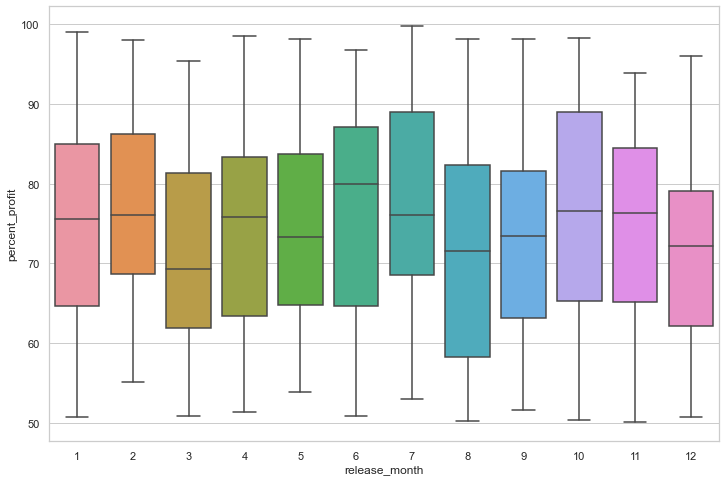

In [34]:
sns.set(style="whitegrid")  # Optional: Set a Seaborn style

# Create the violin plot
plt.figure(figsize=(12,8))
sns.boxplot(x="release_month", y="percent_profit", data=pos_profit_50)

# Show the plot
plt.show()



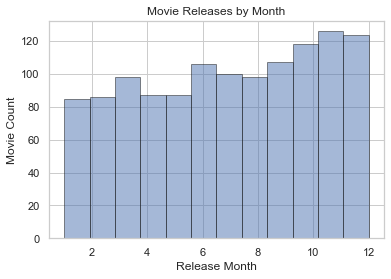

In [35]:
plt.hist(clean_finance_plus_vote['release_month'], bins=12, edgecolor='k', alpha=0.5)  # Adjust the number of bins as needed
plt.xlabel('Release Month')
plt.ylabel('Movie Count')
plt.title('Movie Releases by Month')
plt.grid(True)

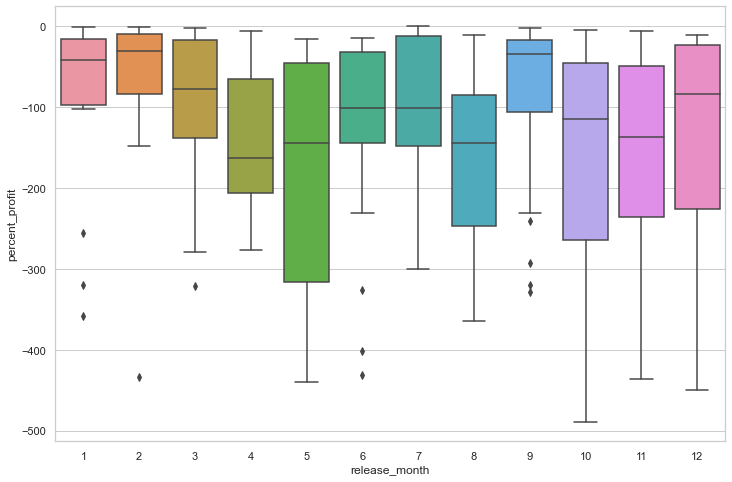

In [36]:
sns.set(style="whitegrid")  # Optional: Set a Seaborn style

# Create the violin plot
plt.figure(figsize=(12,8))
sns.boxplot(x="release_month", y="percent_profit", data=neg_profit)

# Show the plot
plt.show()

In [37]:
pos_profit.groupby('studio')['vote_average','popularity','percent_profit'].mean().sort_values(by='popularity', ascending=False)

,vote_average,popularity,percent_profit
studio,,,
Studio 8,5.900000,24.536000,48.807965
BV,6.772603,20.637808,62.211880
MGM,6.350000,18.528500,61.009355
LGP,5.000000,17.867000,68.397014
MBox,7.300000,17.823000,62.401927
STX,6.428571,16.276643,61.202181
Fox,6.307619,16.210429,63.637034
WB,6.527000,16.199840,54.753852
Annapurna,6.200000,16.115000,23.427284


In [38]:
from pandasql import sqldf 

In [39]:
pysqldf = lambda q: sqldf(q, globals())

In [40]:
q6 = '''
SELECT title, studio, percent_profit
FROM clean_finance_plus_vote
WHERE studio = 'Ratt.'
;'''

pysqldf(q6)

,title,studio,percent_profit


In [41]:
q = '''
SELECT title, studio, production_budget, worldwide_gross, year, release_month, popularity, vote_average, percent_profit
FROM clean_finance_plus_vote
GROUP BY studio
;'''

pysqldf(q)

,title,studio,production_budget,worldwide_gross,year,release_month,popularity,vote_average,percent_profit
0,SEA-REX-3D:-JOURNEY-TO-A-PREHISTORIC-WORLD,3D,5000000,16515203,2010,5,2.746,7.4,69.724865
1,A-MOST-VIOLENT-YEAR,A24,20000000,8846875,2014,12,12.271,6.6,-126.068527
2,CASINO-JACK,ATO,12500000,2272186,2010,12,9.432,6.1,-450.131019
3,"PAUL,-APOSTLE-OF-CHRIST",Affirm,5000000,25529498,2018,3,12.005,7.1,80.414813
4,SUSPIRIA,Amazon,20000000,7034615,2018,10,16.925,7.0,-184.308381
...,...,...,...,...,...,...,...,...,...
71,PADDINGTON,W/Dim.,55000000,258789097,2015,1,13.565,7.0,78.747173
72,JUSTICE-LEAGUE,WB,300000000,655945209,2017,11,34.953,6.2,54.264473
73,THE-HOBBIT:-AN-UNEXPECTED-JOURNEY,WB (NL),250000000,1017003568,2012,12,26.939,7.2,75.417982
74,DJANGO-UNCHAINED,Wein.,100000000,449948323,2012,12,21.260,8.0,77.775226


In [42]:
clean_finance_plus_vote['year'].value_counts()

2010    162
2011    154
2015    141
2012    141
2016    137
2013    137
2014    134
2017    110
2018    106
Name: year, dtype: int64

In [43]:
cleaned_finance_plus_vote = clean_finance_plus_vote.drop_duplicates(subset='title')

In [44]:
query3 = """
SELECT studio, COUNT(studio), AVG(percent_profit) AS avg_percent_profit, AVG(production_budget) as avg_production_budget
FROM cleaned_finance_plus_vote
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY avg_percent_profit DESC
"""
result = pysqldf(query3)
result

,studio,COUNT(studio),avg_percent_profit,avg_production_budget
0,BH Tilt,5,75.599998,2.800000e+06
1,Affirm,2,73.378039,3.500000e+06
2,TriS,17,69.911854,2.804706e+07
3,WB (NL),39,61.503496,5.732308e+07
4,MGM,2,61.009355,4.300000e+07
5,W/Dim.,7,59.578198,2.492857e+07
6,Sony,72,57.159963,6.931250e+07
7,Par.,73,52.790201,6.352055e+07
8,Gold.,4,51.540381,7.075000e+06
9,P/DW,10,50.256345,1.334000e+08


In [45]:
neg_profit.groupby('studio')['percent_profit'].mean().sort_values(ascending=False)

studio
CE              -6.450109
Osci.           -6.955990
Studio 8       -15.615923
Global Road    -17.565925
WB (NL)        -19.916718
W/Dim.         -26.387306
ENTMP          -29.183595
Cohen          -31.887912
BST            -33.760706
Par.           -38.181705
LD             -46.534256
LG/S           -48.819431
Sony           -51.105447
SGem           -56.832860
SPC            -67.106635
Focus          -75.157987
Uni.           -75.422244
Anch.          -75.470265
FoxS           -76.103624
App.           -79.970871
FD             -80.964596
EOne           -84.314597
P/DW           -92.395695
Saban          -94.704737
CBS            -95.868019
STX            -98.597529
WB            -101.460243
SMod          -101.653966
LGF           -107.123295
ParV          -112.398688
A24           -115.294630
Fox           -115.882391
Drft.         -117.877103
BV            -120.936624
EC            -133.171797
MNE           -149.920320
BG            -155.190171
RAtt.         -160.310043
VE   

In [46]:
pos_profit.groupby(['studio'])['profit_margin'].sum().sort_values(ascending=False)

studio
BV           2.818208e+10
Uni.         2.321446e+10
Fox          1.957517e+10
WB           1.665112e+10
Sony         1.282708e+10
Par.         1.002040e+10
WB (NL)      6.627107e+09
LGF          4.800926e+09
P/DW         3.763237e+09
LG/S         2.088573e+09
Wein.        1.945209e+09
SGem         1.759273e+09
FoxS         1.680774e+09
Focus        1.289916e+09
Sum.         1.198304e+09
TriS         1.122547e+09
Rela.        9.527587e+08
STX          7.118264e+08
ORF          6.456595e+08
SPC          5.180393e+08
W/Dim.       4.188420e+08
IFC          3.829675e+08
CBS          3.817460e+08
A24          3.030429e+08
Strand       2.585564e+08
FD           2.465350e+08
RAtt.        2.067651e+08
MGM          1.935593e+08
MBox         1.493740e+08
BST          5.613954e+07
Over.        5.398633e+07
PNT          5.255623e+07
BH Tilt      5.218862e+07
EC           4.905916e+07
Studio 8     4.862487e+07
Neon         4.279741e+07
BG           4.059670e+07
RTWC         3.572062e+07
Mira.

In [47]:
cleaned_pos_profit_50 = pos_profit_50.drop_duplicates(subset='title')
cleaned_pos_profit_50

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,release_month,profitable
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,-26.695917,126.695917,5,1
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,11.973536,88.026464,5,1
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,21.669703,78.330297,4,1
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,-19.940065,119.940065,11,1
5,SPECTRE,300000000,200074175,879620923,Sony,680600000,2015,"[28, 12, 80]",en,Spectre,30.318,2015-11-06,6.4,6719,579620923,65.894399,-17.239858,117.239858,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,92.720956,7.279044,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,49.737073,50.262927,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,54.538819,45.461181,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,55.989515,44.010485,7,1


In [48]:
query4 = """
SELECT studio, COUNT(studio) as studio_count, AVG(percent_profit) AS avg_percent_profit, AVG(production_budget) as avg_production_budget
FROM cleaned_pos_profit_50
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY avg_percent_profit DESC
"""
result = pysqldf(query4)
result

,studio,studio_count,avg_percent_profit,avg_production_budget
0,IFC,6,83.912975,8.195000e+06
1,RTWC,3,83.525000,2.000000e+06
2,BH Tilt,4,82.838971,2.250000e+06
3,Magn.,3,82.744600,5.900000e+05
4,FoxS,21,82.710144,1.060048e+07
5,FD,3,80.349288,2.408333e+07
6,RAtt.,10,77.811673,5.905000e+06
7,A24,12,77.571408,6.258333e+06
8,Uni.,88,77.326969,5.158182e+07
9,WB (NL),30,77.320510,5.745333e+07


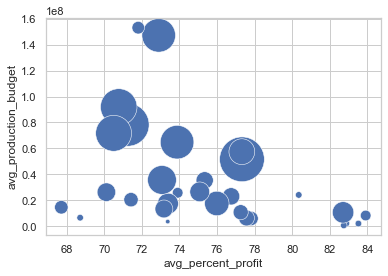

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


# data
data = cleaned_pos_profit_50

avg_percent_profit = result['avg_percent_profit']
avg_production_budget = result['avg_production_budget']
studio_count = result['studio_count']

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x=avg_percent_profit, y=avg_production_budget, size=studio_count, legend=False, sizes=(20, 2000))

# show the graph
plt.show()

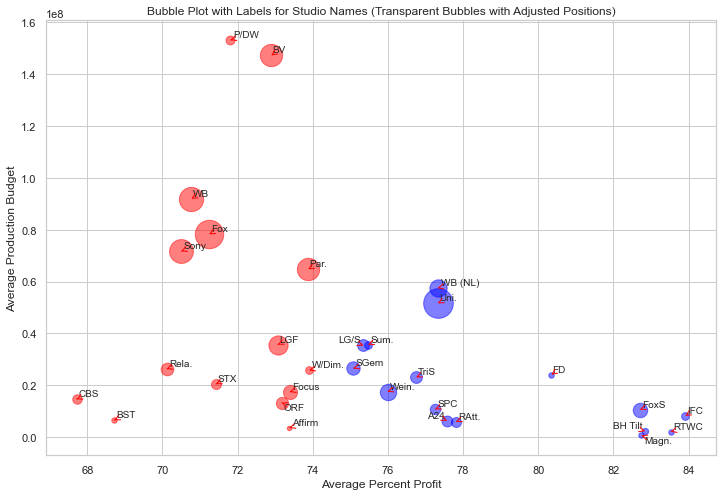

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text  # Import the adjust_text function

# Sample data (same data as before)
data = {
    'studio': ['IFC', 'RTWC', 'BH Tilt', 'Magn.', 'FoxS', 'FD', 'RAtt.', 'A24', 'Uni.', 'WB (NL)', 'SPC', 'TriS', 'Wein.', 'Sum.', 'LG/S', 'SGem', 'W/Dim.', 'Par.', 'Focus', 'Affirm', 'ORF', 'LGF', 'BV', 'P/DW', 'STX', 'Fox', 'WB', 'Sony', 'Rela.', 'BST', 'CBS'],
    'studio_count': [6, 3, 4, 3, 21, 3, 10, 12, 88, 30, 11, 14, 27, 6, 14, 18, 6, 50, 20, 2, 15, 37, 50, 8, 10, 81, 59, 57, 16, 3, 9],
    'avg_percent_profit': [83.912975, 83.525000, 82.838971, 82.744600, 82.710144, 80.349288, 77.811673, 77.571408, 77.326969, 77.320510, 77.258841, 76.750130, 75.988943, 75.474940, 75.341803, 75.078366, 73.905783, 73.874395, 73.387442, 73.378039, 73.173488, 73.069193, 72.894824, 71.806930, 71.421138, 71.242718, 70.768514, 70.496200, 70.110460, 68.713552, 67.713116],
    'avg_production_budget': [8.195000e+06, 2.000000e+06, 2.250000e+06, 5.900000e+05, 1.060048e+07, 2.408333e+07, 5.905000e+06, 6.258333e+06, 5.158182e+07, 5.745333e+07, 1.070909e+07, 2.298571e+07, 1.750000e+07, 3.566667e+07, 3.532143e+07, 2.647222e+07, 2.575000e+07, 6.478000e+07, 1.736000e+07, 3.500000e+06, 1.326667e+07, 3.564291e+07, 1.472280e+08, 1.531250e+08, 2.041000e+07, 7.821605e+07, 9.194915e+07, 7.164035e+07, 2.621250e+07, 6.500000e+06, 1.455556e+07]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create a new column to specify bubble colors
df['color'] = ['blue' if profit > 75 else 'red' for profit in df['avg_percent_profit']]

# Create the bubble plot with labels and transparency
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
texts = []  # Store text objects for adjust_text

for i, row in df.iterrows():
    plt.scatter(
        row['avg_percent_profit'],
        row['avg_production_budget'],
        s=row['studio_count'] * 10,
        c=row['color'],
        alpha=0.5,
    )
    text = plt.text(
        row['avg_percent_profit'],
        row['avg_production_budget'],
        row['studio'],  # Label
        fontsize=10,  # Adjust font size as needed
    )
    texts.append(text)

# Use adjust_text to automatically adjust label positions
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='red'),  # Optional arrow properties
    expand_points=(1.2, 1.2),  # Adjust the expansion factors as needed
    expand_text=(1.2, 1.2),  # Adjust the expansion factors as needed
    force_text=(0.2, 0.2),  # Adjust the force factors as needed
)

# Label the axes and provide a title
plt.xlabel('Average Percent Profit')
plt.ylabel('Average Production Budget')
plt.title('Bubble Plot with Labels for Studio Names (Transparent Bubbles with Adjusted Positions)')

# Show the plot
plt.grid(True)
plt.show()



In [51]:
query5 = """
SELECT studio, COUNT(studio) as studio_count, percent_profit, AVG(production_budget) as avg_production_budget
FROM cleaned_pos_profit_50
WHERE percent_profit > 75 
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY percent_profit DESC
"""
result2 = pysqldf(query5)
result2

,studio,studio_count,percent_profit,avg_production_budget
0,FD,2,98.498061,1.125000e+06
1,Sum.,3,90.369675,3.600000e+07
2,Magn.,2,89.602182,7.500000e+05
3,RAtt.,6,89.065255,2.858333e+06
4,A24,6,87.279097,5.100000e+06
5,TriS,9,85.094530,1.375556e+07
6,P/DW,5,82.648012,1.570000e+08
7,Rela.,6,82.643902,1.023333e+07
8,Sony,20,81.990532,6.630000e+07
9,BH Tilt,3,81.876709,1.666667e+06


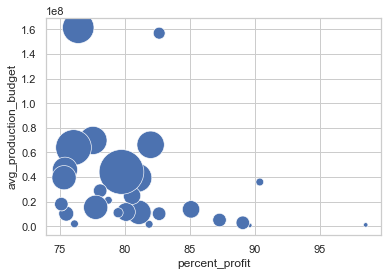

In [52]:
data = cleaned_pos_profit_50

percent_profit = result2['percent_profit']
avg_production_budget = result2['avg_production_budget']
studio_count = result2['studio_count']

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x=percent_profit, y=avg_production_budget, size=studio_count, legend=False, sizes=(20, 2000))

# show the graph
plt.show()

In [53]:
plot = clean_finance_plus_vote.groupby('release_month')['worldwide_gross'].sum()
print(plot)

release_month
1     8.397251e+09
2     1.418530e+10
3     1.388253e+10
4     1.245455e+10
5     2.143036e+10
6     2.723926e+10
7     2.263371e+10
8     1.105552e+10
9     1.121356e+10
10    1.067385e+10
11    2.680241e+10
12    2.195390e+10
Name: worldwide_gross, dtype: float64


In [54]:
sns.scatterplot(x=plot["release_month"], y=plot['worldwide_gross'])

KeyError: 'release_month'

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

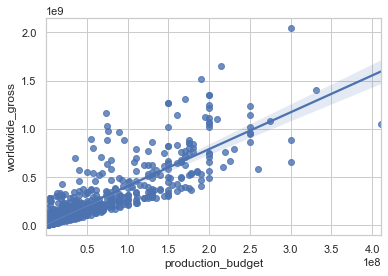

In [55]:
# use the function regplot to make a scatterplot
sns.regplot(x=pos_profit_50["production_budget"], y=pos_profit_50["worldwide_gross"])

<AxesSubplot:xlabel='production_budget', ylabel='percent_profit'>

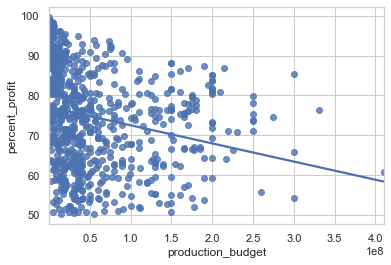

In [56]:
sns.regplot(x=pos_profit_50["production_budget"], y=pos_profit_50["percent_profit"], ci=None)

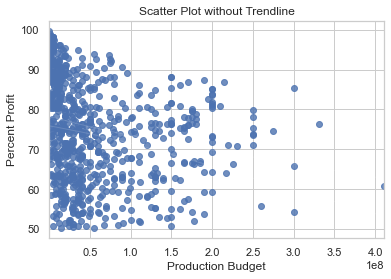

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your data and created the DataFrame pos_profit_50

# Create the scatter plot without a trendline
sns.regplot(x=pos_profit_50["production_budget"], y=pos_profit_50["percent_profit"], line_kws={"color": "none"})

# Show the plot
plt.xlabel('Production Budget')
plt.ylabel('Percent Profit')
plt.title('Scatter Plot without Trendline')
plt.show()



<AxesSubplot:xlabel='percent_profit', ylabel='popularity'>

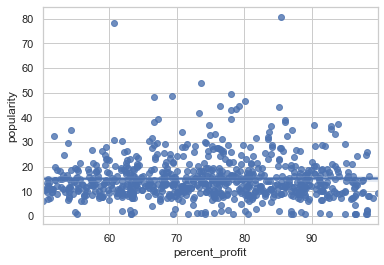

In [58]:
sns.regplot(x=pos_profit_50["percent_profit"], y=pos_profit_50["popularity"])

In [59]:
pos_profit_50.groupby('studio')['vote_average','popularity','percent_profit'].mean().sort_values(by='percent_profit', ascending=False)

,vote_average,popularity,percent_profit
studio,,,
ParV,6.500000,10.091000,93.294711
Orch.,7.800000,12.545000,89.515856
Gold.,6.500000,2.053000,86.927653
Magn.,7.025000,6.313250,84.842032
PNT,6.300000,11.000000,84.014381
PFR,7.000000,5.599000,83.921628
RTWC,6.433333,11.111667,83.525000
IFC,6.614286,9.559571,83.282389
BH Tilt,5.875000,15.325250,82.838971


In [60]:
prod_less_100 = pos_profit_50[clean_finance_plus_vote['production_budget'] < 100000000]
prod_less_100.groupby('studio')['vote_average','popularity','percent_profit'].mean().sort_values(by='percent_profit', ascending=False)

,vote_average,popularity,percent_profit
studio,,,
ParV,6.500000,10.091000,93.294711
Orch.,7.800000,12.545000,89.515856
Gold.,6.500000,2.053000,86.927653
Magn.,7.025000,6.313250,84.842032
PNT,6.300000,11.000000,84.014381
PFR,7.000000,5.599000,83.921628
RTWC,6.433333,11.111667,83.525000
IFC,6.614286,9.559571,83.282389
BH Tilt,5.875000,15.325250,82.838971


In [61]:
q = '''
SELECT studio, COUNT(studio), AVG(production_budget), AVG(worldwide_gross), year, AVG(percent_profit)
FROM prod_less_100
GROUP BY studio
;'''

pysqldf(q)

,studio,COUNT(studio),AVG(production_budget),AVG(worldwide_gross),year,AVG(percent_profit)
0,3D,1,5.000000e+06,1.651520e+07,2010,69.724865
1,A24,12,6.258333e+06,3.064280e+07,2015,77.571408
2,Affirm,2,3.500000e+06,1.573575e+07,2018,73.378039
3,BG,1,8.000000e+06,3.711936e+07,2015,78.447903
4,BH Tilt,4,2.250000e+06,1.420440e+07,2016,82.838971
5,BST,3,6.500000e+06,2.012509e+07,2016,68.713552
6,BV,16,4.102500e+07,1.458773e+08,2011,70.432910
7,CBS,9,1.455556e+07,5.190063e+07,2010,67.713116
8,Cleopatra,1,8.000000e+06,1.738269e+07,2016,53.977212
9,EC,1,2.200000e+07,6.969850e+07,2015,68.435473


In [62]:
query = """
SELECT studio, COUNT(studio), AVG(percent_profit) AS avg_percent_profit
FROM prod_less_100
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY avg_percent_profit DESC
"""
result = pysqldf(query)
result

,studio,COUNT(studio),avg_percent_profit
0,Magn.,4,84.842032
1,RTWC,3,83.525000
2,IFC,7,83.282389
3,BH Tilt,4,82.838971
4,FoxS,21,82.710144
5,Uni.,86,80.692567
6,FD,3,80.349288
7,SPC,12,78.448249
8,TriS,13,78.187054
9,RAtt.,10,77.811673


In [63]:
query = """
SELECT studio, COUNT(studio), AVG(percent_profit) AS avg_percent_profit
FROM prod_less_100
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY avg_percent_profit DESC
"""
result = pysqldf(query)
result

,studio,COUNT(studio),avg_percent_profit
0,Magn.,4,84.842032
1,RTWC,3,83.525000
2,IFC,7,83.282389
3,BH Tilt,4,82.838971
4,FoxS,21,82.710144
5,Uni.,86,80.692567
6,FD,3,80.349288
7,SPC,12,78.448249
8,TriS,13,78.187054
9,RAtt.,10,77.811673


In [64]:
query3 = """
SELECT *
FROM prod_less_100
WHERE title = 'SPLIT'
ORDER BY percent_profit DESC
"""
result = pysqldf(query3)
result

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,release_month,profitable
0,SPLIT,5000000,138141585,278964806,Uni.,140200000,2017,[18],en,Split,0.906,2012-05-24 00:00:00.000000,5.3,2,273964806,98.207659,48.598062,51.401938,5,1
1,SPLIT,5000000,138141585,278964806,Uni.,140200000,2017,"[27, 53]",en,Split,25.783,2016-09-26 00:00:00.000000,7.2,10375,273964806,98.207659,48.598062,51.401938,9,1
2,SPLIT,5000000,138141585,278964806,Uni.,140200000,2017,"[14, 18]",en,Split,2.454,2016-04-07 00:00:00.000000,5.0,5,273964806,98.207659,48.598062,51.401938,4,1
3,SPLIT,5000000,138141585,278964806,Uni.,140200000,2017,"[35, 10749]",en,Split,2.029,2016-08-02 00:00:00.000000,4.8,16,273964806,98.207659,48.598062,51.401938,8,1


In [65]:
prod_less_100 = prod_less_100.drop(['genre_ids', 'popularity', 'vote_average', 'vote_count', 'release_month', 'release_date'], axis=1)
prod_less_100 = prod_less_100.drop_duplicates(subset='title')


In [66]:
query2 = """
SELECT studio, COUNT(studio), AVG(percent_profit) AS avg_percent_profit
FROM prod_less_100
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY avg_percent_profit DESC
"""
result = pysqldf(query2)
result

,studio,COUNT(studio),avg_percent_profit
0,IFC,6,83.912975
1,RTWC,3,83.525000
2,BH Tilt,4,82.838971
3,Magn.,3,82.744600
4,FoxS,21,82.710144
5,FD,3,80.349288
6,Uni.,75,78.622052
7,TriS,13,78.187054
8,RAtt.,10,77.811673
9,WB (NL),26,77.722193


<AxesSubplot:xlabel='production_budget', ylabel='percent_profit'>

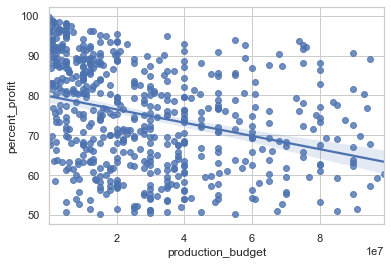

In [67]:
sns.regplot(x=prod_less_100["production_budget"], y=prod_less_100["percent_profit"])

In [68]:
prod_less_40 = pos_profit_50[clean_finance_plus_vote['production_budget'] < 40000000]
prod_less_40

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,release_month,profitable
492,THE-KARATE-KID,8000000,90815558,90815558,Sony,182500000,2010,"[28, 12, 18, 10751]",en,The Karate Kid,12.256,2010-06-10,6.3,3140,82815558,91.190937,100.000000,0.000000,6,1
552,FRANKENWEENIE,39000000,35287788,81150788,BV,46200000,2012,"[16, 35, 10751]",en,Frankenweenie,14.627,2012-10-05,6.8,1685,42150788,51.941317,-8.806981,108.806981,10,1
553,CAPTAIN-UNDERPANTS:-THE-FIRST-EPIC-MOVIE,38000000,73921000,126577874,Fox,51600000,2017,"[28, 16, 35, 10751]",en,Captain Underpants: The First Epic Movie,18.310,2017-06-02,6.0,587,88577874,69.978955,40.553017,59.446983,6,1
554,PAUL-BLART:-MALL-COP-2,38000000,71091594,107650646,Sony,36600000,2015,"[28, 35, 10751]",en,Paul Blart: Mall Cop 2,15.941,2015-04-17,5.0,900,69650646,64.700630,47.510821,52.489179,4,1
555,WHY-HIM?,38000000,60323786,117425156,Fox,57800000,2016,[35],en,Why Him?,15.044,2016-12-23,6.2,2494,79425156,67.638961,28.106695,71.893305,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,92.720956,7.279044,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,49.737073,50.262927,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,54.538819,45.461181,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,55.989515,44.010485,7,1


In [69]:
prod_less_100

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,original_language,original_title,profit_margin,percent_profit,percent_domestic_profit,percent_foreign_profit,profitable
183,FANTASTIC-FOUR,87500000,154696080,333132750,Fox,111900000,2015,en,Fantastic Four,245632750,73.734195,27.356320,72.643680,1
224,THE-PEANUTS-MOVIE,99000000,130178411,250091610,Fox,116100000,2015,en,The Peanuts Movie,151091610,60.414506,20.635435,79.364565,1
226,ALIEN:-COVENANT,97000000,74262031,238521247,Fox,166600000,2017,en,Alien: Covenant,141521247,59.332763,-16.066824,116.066824,1
227,ICE-AGE:-CONTINENTAL-DRIFT,95000000,161321843,879765137,Fox,715900000,2012,en,Ice Age: Continental Drift,784765137,89.201663,8.451171,91.548829,1
228,SEX-AND-THE-CITY-2,95000000,95347692,294680778,WB (NL),193000000,2010,en,Sex and the City 2,199680778,67.761725,0.174124,99.825876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,en,Sound of My Voice,294448,68.564296,92.720956,7.279044,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,en,Your Sister's Sister,2970593,96.117250,49.737073,50.262927,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,en,The Gallows,41556474,99.759941,54.538819,45.461181,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,en,A Ghost Story,2669782,96.389608,55.989515,44.010485,1


<AxesSubplot:xlabel='production_budget', ylabel='percent_profit'>

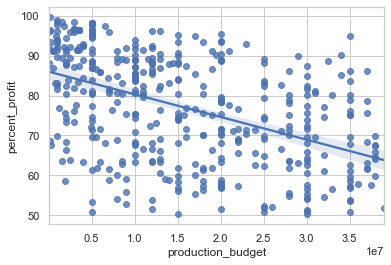

In [70]:
sns.regplot(x=prod_less_40["production_budget"], y=prod_less_40["percent_profit"])

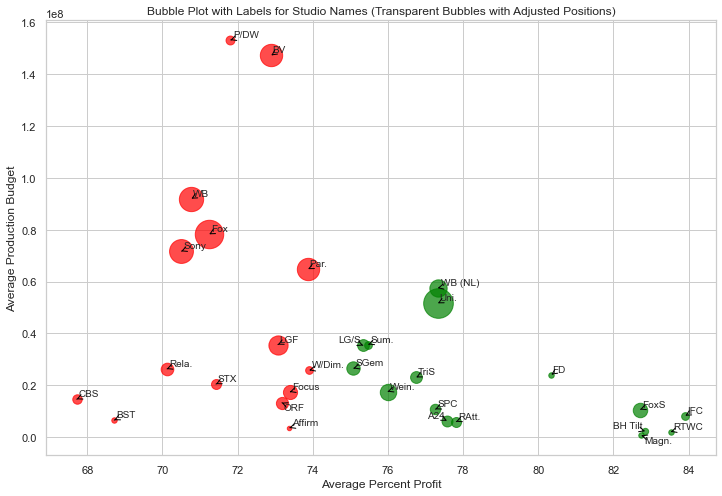

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text  # Import the adjust_text function

# Sample data (same data as before)
data = {
    'studio': ['IFC', 'RTWC', 'BH Tilt', 'Magn.', 'FoxS', 'FD', 'RAtt.', 'A24', 'Uni.', 'WB (NL)', 'SPC', 'TriS', 'Wein.', 'Sum.', 'LG/S', 'SGem', 'W/Dim.', 'Par.', 'Focus', 'Affirm', 'ORF', 'LGF', 'BV', 'P/DW', 'STX', 'Fox', 'WB', 'Sony', 'Rela.', 'BST', 'CBS'],
    'studio_count': [6, 3, 4, 3, 21, 3, 10, 12, 88, 30, 11, 14, 27, 6, 14, 18, 6, 50, 20, 2, 15, 37, 50, 8, 10, 81, 59, 57, 16, 3, 9],
    'avg_percent_profit': [83.912975, 83.525000, 82.838971, 82.744600, 82.710144, 80.349288, 77.811673, 77.571408, 77.326969, 77.320510, 77.258841, 76.750130, 75.988943, 75.474940, 75.341803, 75.078366, 73.905783, 73.874395, 73.387442, 73.378039, 73.173488, 73.069193, 72.894824, 71.806930, 71.421138, 71.242718, 70.768514, 70.496200, 70.110460, 68.713552, 67.713116],
    'avg_production_budget': [8.195000e+06, 2.000000e+06, 2.250000e+06, 5.900000e+05, 1.060048e+07, 2.408333e+07, 5.905000e+06, 6.258333e+06, 5.158182e+07, 5.745333e+07, 1.070909e+07, 2.298571e+07, 1.750000e+07, 3.566667e+07, 3.532143e+07, 2.647222e+07, 2.575000e+07, 6.478000e+07, 1.736000e+07, 3.500000e+06, 1.326667e+07, 3.564291e+07, 1.472280e+08, 1.531250e+08, 2.041000e+07, 7.821605e+07, 9.194915e+07, 7.164035e+07, 2.621250e+07, 6.500000e+06, 1.455556e+07]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create a new column to specify bubble colors
df['color'] = ['green' if profit > 75 else 'red' for profit in df['avg_percent_profit']]

# Create the bubble plot with labels and transparency
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
texts = []  # Store text objects for adjust_text

for i, row in df.iterrows():
    plt.scatter(
        row['avg_percent_profit'],
        row['avg_production_budget'],
        s=row['studio_count'] * 10,
        c=row['color'],
        alpha=0.7,
    )
    text = plt.text(
        row['avg_percent_profit'],
        row['avg_production_budget'],
        row['studio'],  # Label
        fontsize=10,  # Adjust font size as needed
    )
    texts.append(text)

# Use adjust_text to automatically adjust label positions
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='black'),  # Optional arrow properties
    expand_points=(1.2, 1.2),  # Adjust the expansion factors as needed
    expand_text=(1.2, 1.2),  # Adjust the expansion factors as needed
    force_text=(0.2, 0.2),  # Adjust the force factors as needed
)

# Label the axes and provide a title
plt.xlabel('Average Percent Profit')
plt.ylabel('Average Production Budget')
plt.title('Bubble Plot with Labels for Studio Names (Transparent Bubbles with Adjusted Positions)')

# Show the plot
plt.grid(True)
plt.show()


In [72]:
file_path4 = 'Data/rt.movie_info.tsv.gz'

rt_movie_data = pd.read_csv(file_path4, sep='\t', compression='gzip')
rt_movie_data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [73]:
file_path5 = 'Data/rt.reviews.tsv.gz'
rt_reviews_data = pd.read_table(file_path5, encoding = 'latin1')
rt_reviews_data

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [74]:
rt_reviews_data['Fresh_Count'] = rt_reviews_data['fresh'].apply(lambda x: 1 if x=='fresh' else 0)
rt_reviews_data.groupby('id')['Fresh_Count'].sum().sort_values(ascending=False)

id
782     308
1067    261
1960    255
1083    250
251     243
       ... 
1309      0
644       0
282       0
142       0
408       0
Name: Fresh_Count, Length: 1135, dtype: int64

In [75]:
clean_finance_plus_vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 0 to 1451
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   title                    1222 non-null   object        
 1   production_budget        1222 non-null   int32         
 2   domestic_gross           1222 non-null   int32         
 3   worldwide_gross          1222 non-null   int32         
 4   studio                   1222 non-null   object        
 5   foreign_gross            1222 non-null   int64         
 6   year                     1222 non-null   int64         
 7   genre_ids                1222 non-null   object        
 8   original_language        1222 non-null   object        
 9   original_title           1222 non-null   object        
 10  popularity               1222 non-null   float64       
 11  release_date             1222 non-null   datetime64[ns]
 12  vote_average             1222 non-

In [76]:
clean_finance_plus_vote = clean_finance_plus_vote.drop_duplicates(subset='title')

In [77]:
imdb_data.rename(columns={'primary_title': 'title'}, inplace=True)

In [78]:
full_movies = pd.merge(clean_finance_plus_vote, imdb_data, on='title', how='inner')

In [85]:
full_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13061 entries, 0 to 13060
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   title                    13061 non-null  object        
 1   production_budget        13061 non-null  int32         
 2   domestic_gross           13061 non-null  int32         
 3   worldwide_gross          13061 non-null  int32         
 4   studio                   13061 non-null  object        
 5   foreign_gross            13061 non-null  int64         
 6   year                     13061 non-null  int64         
 7   genre_ids                13061 non-null  object        
 8   original_language        13061 non-null  object        
 9   original_title_x         13061 non-null  object        
 10  popularity               13061 non-null  float64       
 11  release_date             13061 non-null  datetime64[ns]
 12  vote_average             13061 n

In [88]:
full_movies.drop(columns = ['primary_profession', 'death_year', 'birth_year', 'primary_name', 'characters', 'job', 'category', 'person_id', 'ordering'])
full_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13061 entries, 0 to 13060
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   title                    13061 non-null  object        
 1   production_budget        13061 non-null  int32         
 2   domestic_gross           13061 non-null  int32         
 3   worldwide_gross          13061 non-null  int32         
 4   studio                   13061 non-null  object        
 5   foreign_gross            13061 non-null  int64         
 6   year                     13061 non-null  int64         
 7   genre_ids                13061 non-null  object        
 8   original_language        13061 non-null  object        
 9   original_title_x         13061 non-null  object        
 10  popularity               13061 non-null  float64       
 11  release_date             13061 non-null  datetime64[ns]
 12  vote_average             13061 n

primary_name, runtime_minutes, primary_profession, averagerating, genres

In [80]:
q8 = ''' 
SELECT
    title,
    studio,
    genres
FROM
    full_movies
WHERE
    studio IN ('IFC', 'RTWC', 'A24', 'BH Tilt', 'Wein.', 'FoxS', 'WB (NL)')
GROUP BY
    studio,
    genres
ORDER BY
    studio;
'''

studio_genres = pysqldf(q8)
studio_genres

,title,studio,genres
0,FREE-FIRE,A24,"Action,Comedy,Crime"
1,THE-ROVER,A24,"Action,Crime,Drama"
2,SWISS-ARMY-MAN,A24,"Adventure,Comedy,Drama"
3,LEAN-ON-PETE,A24,"Adventure,Drama"
4,AMERICAN-HONEY,A24,"Adventure,Drama,Romance"
...,...,...,...
128,THE-GIVER,Wein.,"Drama,Romance,Sci-Fi"
129,SOUTHPAW,Wein.,"Drama,Sport"
130,CORIOLANUS,Wein.,"Drama,Thriller,War"
131,DJANGO-UNCHAINED,Wein.,"Drama,Western"


In [81]:
studio_genres['genres'] = studio_genres['genres'].str.split(',')
studio_genres = studio_genres.explode('genres')
genre_counts = studio_genres.groupby(['studio', 'genres']).size().reset_index(name='genre_count')
genre_counts

,studio,genres,genre_count
0,A24,Action,2
1,A24,Adventure,3
2,A24,Biography,1
3,A24,Comedy,8
4,A24,Crime,4
...,...,...,...
87,Wein.,Sci-Fi,2
88,Wein.,Sport,1
89,Wein.,Thriller,6
90,Wein.,War,2


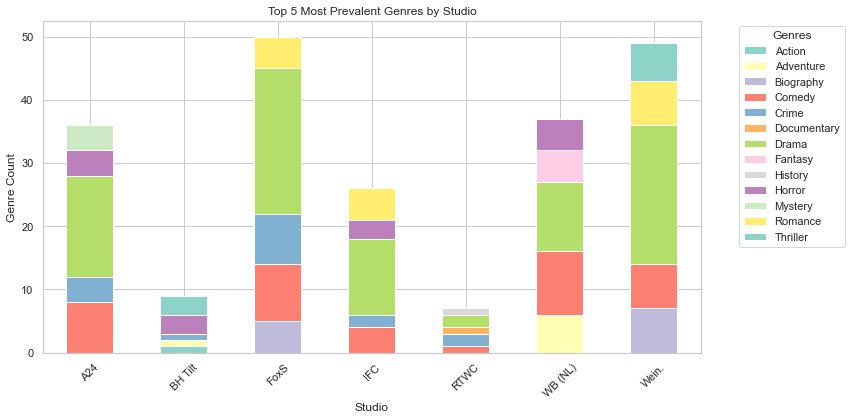

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample data (replace with your actual data)
data = genre_counts

df = pd.DataFrame(data)

# Sort the data by genre count within each studio
df_sorted = df.sort_values(by=['studio', 'genre_count'], ascending=[True, False])

# Get the top 5 genres for each studio
top5_genres = df_sorted.groupby('studio').head(5)

# Pivot the DataFrame for plotting
pivot_table = top5_genres.pivot(index='studio', columns='genres', values='genre_count').fillna(0)

# Create a custom color palette with distinct colors for each genre
unique_genres = top5_genres['genres'].unique()
palette = sns.color_palette("Set3", len(unique_genres))

# Create the bar plot using the custom palette
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=palette)

# Customize the plot
plt.xlabel('Studio')
plt.ylabel('Genre Count')
plt.title('Top 5 Most Prevalent Genres by Studio')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [83]:
q9 = ''' 
SELECT
    title,
    studio,
    runtime_minutes,
    averagerating
FROM
    full_movies
WHERE
    studio IN ('IFC', 'RTWC', 'A24', 'BH Tilt', 'Wein.', 'FoxS', 'WB (NL)')
GROUP BY title
ORDER BY
    studio;
'''

studio_runtime = pysqldf(q9)
studio_runtime

,title,studio,runtime_minutes,averagerating
0,A-GHOST-STORY,A24,92.0,6.8
1,A-MOST-VIOLENT-YEAR,A24,125.0,7.0
2,AMERICAN-HONEY,A24,163.0,7.0
3,EX-MACHINA,A24,108.0,7.7
4,FREE-FIRE,A24,91.0,6.4
...,...,...,...,...
163,THE-MASTER,Wein.,138.0,7.1
164,THE-RAILWAY-MAN,Wein.,116.0,7.1
165,THE-SAPPHIRES,Wein.,103.0,7.0
166,TULIP-FEVER,Wein.,105.0,6.2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
data = studio_runtime
df = pd.DataFrame(data)

# Create a boxplot with seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='studio', y='runtime_minutes', palette='Set3')

# Calculate the median runtime for each studio
median_runtimes = df.groupby('studio')['runtime_minutes'].median().reset_index()

# Mark the median runtime for each studio on the plot
for index, row in median_runtimes.iterrows():
    studio = row['studio']
    median_runtime = row['runtime_minutes']
    plt.text(index, median_runtime + 5, f'Median: {median_runtime} min', ha='center', va='bottom', fontsize=10, color='blue')

# Calculate the average of the averagerating column
average_rating = df['averagerating'].mean()

# Label the average of the averagerating column
plt.text(0.5, 155, f'Avg Rating: {average_rating:.2f}', ha='center', va='bottom', fontsize=12, color='red')

# Customize the plot
plt.title('Boxplot of Runtimes by Studio with Median Runtime and Avg Rating Labeled')
plt.xlabel('Studio')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)

# Shorten the y-axis to the range 60 to 160
plt.ylim(60, 160)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
data = studio_runtime

df = pd.DataFrame(data)

# Create a boxplot with seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='studio', y='runtime_minutes', palette='Set3')

# Calculate the median runtime for each studio
median_runtimes = df.groupby('studio')['runtime_minutes'].median().reset_index()

# Mark the median runtime for each studio on the plot
for index, row in median_runtimes.iterrows():
    studio = row['studio']
    median_runtime = row['runtime_minutes']
    plt.text(index, median_runtime + 5, f'Median: {median_runtime} min', ha='center', va='bottom', fontsize=10, color='black')

# Calculate the average of the averagerating column for each studio
average_ratings = df.groupby('studio')['averagerating'].mean().reset_index()

# Mark the average of averagerating for each studio on the plot
for index, row in average_ratings.iterrows():
    studio = row['studio']
    avg_rating = row['averagerating']
    plt.text(index, 160, f'Avg Rating: {avg_rating:.2f}', ha='center', va='bottom', fontsize=10, color='red')

# Customize the plot
plt.title('Boxplot of Runtimes by Studio with Median Runtime and Avg Rating Labeled')
plt.xlabel('Studio')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)

# Shorten the y-axis to the range 60 to 160
plt.ylim(60, 160)

# Show the plot
plt.tight_layout()
plt.show()


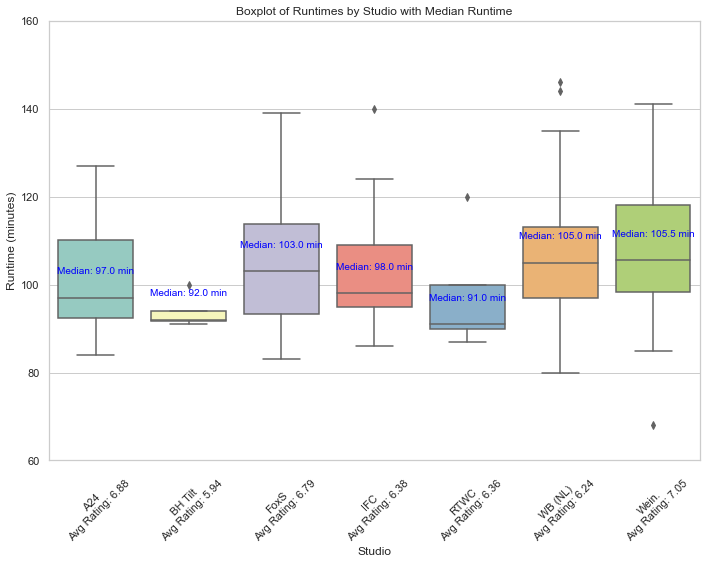

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
data = studio_runtime

df = pd.DataFrame(data)

# Calculate the median runtime for each studio
median_runtimes = df.groupby('studio')['runtime_minutes'].median().reset_index()

# Calculate the average of the averagerating column for each studio
average_ratings = df.groupby('studio')['averagerating'].mean().reset_index()

# Create a dictionary to map studio names to average ratings
studio_rating_dict = dict(zip(average_ratings['studio'], average_ratings['averagerating']))

# Create a boxplot with seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='studio', y='runtime_minutes', palette='Set3')

# Mark the median runtime for each studio on the plot
for index, row in median_runtimes.iterrows():
    studio = row['studio']
    median_runtime = row['runtime_minutes']
    plt.text(index, median_runtime + 5, f'Median: {median_runtime} min', ha='center', va='bottom', fontsize=10, color='blue')

# Customize the plot
plt.title('Boxplot of Runtimes by Studio with Median Runtime')
plt.xlabel('Studio')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)

# Shorten the y-axis to the range 60 to 160
plt.ylim(60, 160)

# Add average rating labels next to studio tickmarks
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    studio_name = label.get_text()
    if studio_name in studio_rating_dict:
        avg_rating = studio_rating_dict[studio_name]
        label.set_text(f'{studio_name}\nAvg Rating: {avg_rating:.2f}')
    else:
        label.set_text(studio_name)
ax.set_xticklabels(xtick_labels)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
clean_finance_plus_vote.info()